In [1]:
pal = [(39/255,95/255,153/255),(80/255,176/255,220/255),
       (237/255,244/255,248/255),
       (146/255,144/255,142/255),
       (78/255,78/255,80/255),
(235/255,154/255,88/255),(87/255,126/255,130/255)]

from dask import compute, delayed
from dask.distributed import Client

import sys
import math
sys.path.append("/Users/rcarlson/Documents/GitHub/lasagna3/snakes")
from ops.imports_ipython import *

import javabridge
import bioformats
from scipy import ndimage
import matplotlib.pyplot as plt
from ops.firedove_barplots_v2 import *

import glob

Could not find Java JRE compatible with x86_64 architecture
/Users/rcarlson/miniconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Rescue

2418061
gate applied, retained  75 % of data
number nt 6000
dapi_gfp_corr_nuclear
auc done
                 gene  n_sg  fisher_combined_chi          pval  fdr_bh_adj_p  \
0        nontargeting   1.0            -0.000000  1.000000e+00  1.000000e+00   
1             ATP13A1   1.0            54.689889  1.331194e-12  5.324777e-12   
2  nontargetingrescue   1.0             8.994909  1.113731e-02  2.227462e-02   
3       ATP13A1rescue   1.0             5.286446  7.113164e-02  9.484219e-02   

   significant pval_text  
0        False            
1         True      ****  
2         True         *  
3        False            
grped done
                  gene                 sgRNA  rep  dapi_gfp_corr_nuclear  \
0         nontargeting        nontargeting_0  5.0              -0.001602   
1         nontargeting        nontargeting_0  2.0               0.000398   
2         nontargeting        nontargeting_0  8.0              -0.007231   
3         nontargeting        nontargeting_0  7.0         

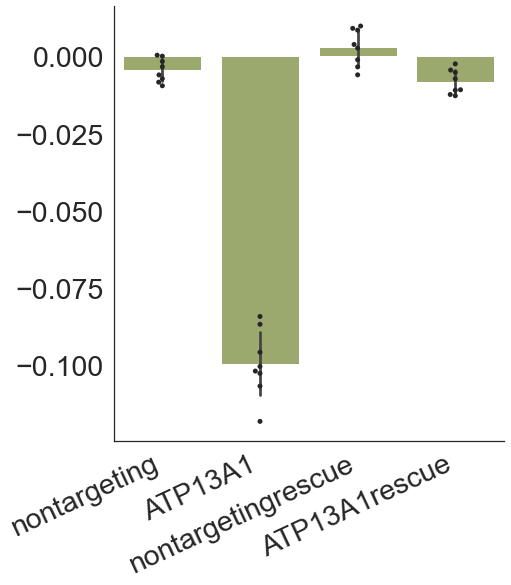

In [26]:
df = pd.read_hdf('../../Zenodo_IRF3/Figure5/Rescue/rescue_transloc.hdf')



df.gene = df.gene.astype('category')
sorter = ['nontargeting', 'ATP13A1','nontargetingrescue','ATP13A1rescue']
df.gene.cat.set_categories(sorter, inplace=True)
df = df.sort_values(["gene"])
df.gene = df.gene.astype('string')

aucs, grped = produce_barplot_general(df,  df_name = 'rescuegreen', pshow = False, 
                                   genes =  pd.unique(df.gene),
                        gate = '100 < i <1380 & 100 < j < 1380  & area > 30 ',
                    replist = [1,2,3,4,5,6,7,8],  nbins=50,  
                        feature='dapi_gfp_corr_nuclear', pal = 'green',  range_vals = (-1,.8),
                   alpha=.05)

##

2418061
gate applied, retained  75 % of data
number nt 6000
dapi_gfp_corr_nuclear
auc done
                 gene  n_sg  fisher_combined_chi          pval  fdr_bh_adj_p  \
0        nontargeting   1.0            -0.000000  1.000000e+00  1.000000e+00   
1             ATP13A1   1.0            54.689889  1.331194e-12  5.324777e-12   
2  nontargetingrescue   1.0             8.994909  1.113731e-02  2.227462e-02   
3       ATP13A1rescue   1.0             5.286446  7.113164e-02  9.484219e-02   

   significant pval_text  
0        False            
1         True      ****  
2         True         *  
3        False            
grped done
                  gene                 sgRNA  rep  dapi_gfp_corr_nuclear  \
0         nontargeting        nontargeting_0  5.0              -0.001602   
1         nontargeting        nontargeting_0  2.0               0.000398   
2         nontargeting        nontargeting_0  8.0              -0.007231   
3         nontargeting        nontargeting_0  7.0         

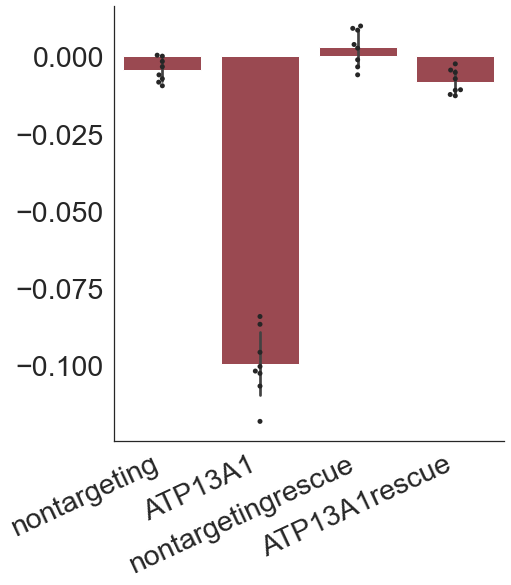

In [27]:


aucs, grped = produce_barplot_general(df,  df_name = 'rescuered', pshow = False, 
                                   genes =  pd.unique(df.gene),
                        gate = '100 < i <1380 & 100 < j < 1380  & area > 30 ',
                    replist = [1,2,3,4,5,6,7,8],  nbins=50,  
                        feature='dapi_gfp_corr_nuclear', pal = 'red',  range_vals = (-1,.8),
                   alpha=.05)

##

### Divalent cations

In [37]:
df = pd.read_hdf('../../Zenodo_IRF3/Figure5/Cations/M142.hdf')

In [38]:
df.sgRNA = df.gene + '_' + df.sgRNA

In [36]:
df.head()

,gene,sgRNA,well,rep,cell,channel_corrch1_nuclear_corr,channel_nuclear_median,area,i,j,site,plate
0,ATP13A1,ATP13A10,A01,1,12,0.627065,12735.0,179,33.067039,1042.463687,0,M136
1,ATP13A1,ATP13A10,A01,1,16,0.830224,8079.0,307,43.986971,1258.097720,0,M136
2,ATP13A1,ATP13A10,A01,1,19,0.422882,3724.0,563,53.742451,726.623446,0,M136
3,ATP13A1,ATP13A10,A01,1,20,-0.400092,5711.0,625,56.331200,478.580800,0,M136
4,ATP13A1,ATP13A10,A01,1,21,0.712967,10998.5,182,60.043956,812.401099,0,M136


In [44]:
pd.unique(df.gene)

array(['ATP13A1', 'nontargeting', 'MnCl2-250-ATP13A1',
       'MnCl2-250-nontargeting', 'MgCl2-250-ATP13A1',
       'MgCl2-250-nontargeting', 'MgCl2-5000-ATP13A1',
       'MgCl2-5000-nontargeting', 'CaCl2-250-ATP13A1',
       'CaCl2-250-nontargeting', 'CaCl2-5000-ATP13A1',
       'CaCl2-5000-nontargeting'], dtype=object)

842846
gate applied, retained  83 % of data
number nt 6000
channel_corrch1_nuclear_corr
auc done
                       gene  n_sg  fisher_combined_chi          pval  \
0              nontargeting   2.0             1.550318  8.176924e-01   
1                   ATP13A1   2.0            39.523333  5.430996e-08   
2    MnCl2-250-nontargeting   2.0            38.680033  8.111271e-08   
3         MnCl2-250-ATP13A1   2.0            38.782706  7.724821e-08   
4    MgCl2-250-nontargeting   2.0             3.344310  5.019424e-01   
5         MgCl2-250-ATP13A1   2.0            39.683242  5.032977e-08   
6   MgCl2-5000-nontargeting   2.0            32.455751  1.543672e-06   
7        MgCl2-5000-ATP13A1   2.0            56.296058  1.738103e-11   
8    CaCl2-250-nontargeting   2.0             5.014897  2.857724e-01   
9         CaCl2-250-ATP13A1   2.0            36.803382  1.977365e-07   
10  CaCl2-5000-nontargeting   2.0             3.329285  5.043058e-01   
11       CaCl2-5000-ATP13A1   2.0      

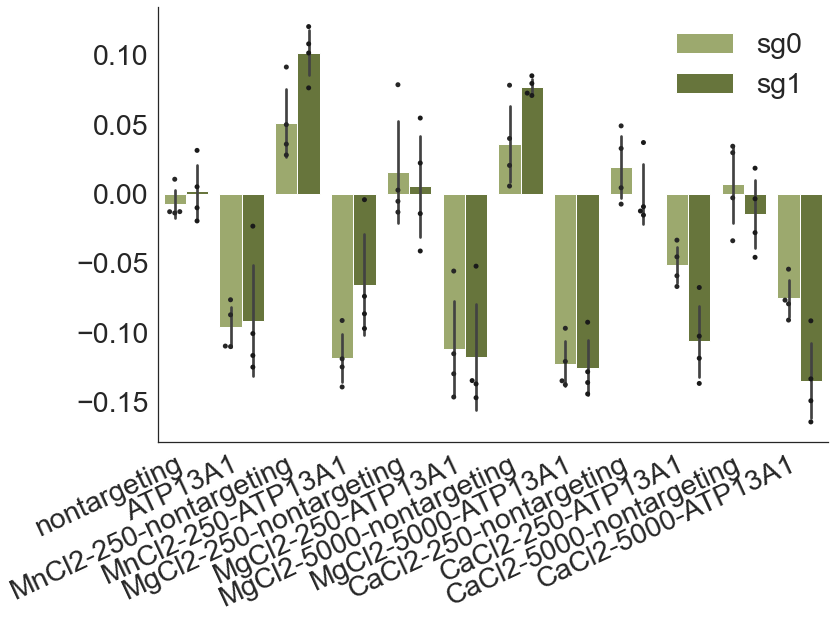

In [46]:



df.gene = df.gene.astype('category')
sorter = ['nontargeting', 'ATP13A1','MnCl2-250-nontargeting','MnCl2-250-ATP13A1',
        'MgCl2-250-nontargeting','MgCl2-250-ATP13A1',
        'MgCl2-5000-nontargeting','MgCl2-5000-ATP13A1',
        'CaCl2-250-nontargeting','CaCl2-250-ATP13A1',
        'CaCl2-5000-nontargeting','CaCl2-5000-ATP13A1',
       ]
df.gene.cat.set_categories(sorter, inplace=True)
df = df.sort_values(["gene"])
df.gene = df.gene.astype('string')

aucs, grped = produce_barplot_general(df,  df_name = 'm142', pshow = False, 
                                   genes =  pd.unique(df.gene),
                        gate = '100 < i <1380 & 100 < j < 1380  & area > 80 ',
                    replist = [1,2,3,4],  nbins=50,  
                        feature='channel_corrch1_nuclear_corr', pal = 'green',  range_vals = (-1,1),
                   alpha=.05)

##

### Split-GFP

In [3]:
df = pd.read_hdf('../../Zenodo_IRF3/Figure5/SplitGFP-Localization/M165.hdf')

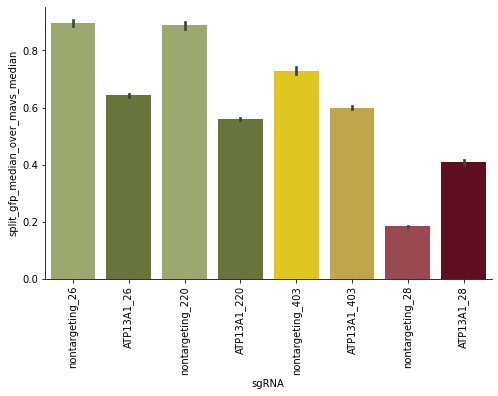

In [18]:
pal = [( 0.6313725490196078, 0.7019607843137254, 0.39215686274509803),(108/255, 126/255, 51/255),
       ( 0.6313725490196078, 0.7019607843137254, 0.39215686274509803),(108/255, 126/255, 51/255),
       (1, 223/255, 0/255), (212/255, 175/255, 55/255),
          (0.6549019607843137, 0.23529411764705882, 0.27450980392156865),(109/255,0,27/255)]

plt.figure(figsize = (8,5))
ax = sns.barplot(data = df.sample(500000, random_state = 3), x = 'sgRNA', y = 'split_gfp_median_over_mavs_median',
                 palette = pal)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

sns.despine(top = True, right = True)

plt.savefig('../Data/F5/splitgfp.tif', dpi = 300, bbox_inches = 'tight')

In [14]:
t1 = scipy.stats.ttest_ind(df[df.sgRNA == "nontargeting_26"].split_gfp_median_over_mavs_median,
                      df[df.sgRNA == "ATP13A1_26"].split_gfp_median_over_mavs_median,
                     axis=0, equal_var=True, nan_policy='propagate')

t2 = scipy.stats.ttest_ind(df[df.sgRNA == "nontargeting_220"].split_gfp_median_over_mavs_median,
                      df[df.sgRNA == "ATP13A1_220"].split_gfp_median_over_mavs_median,
                     axis=0, equal_var=True, nan_policy='propagate')

t3 = scipy.stats.ttest_ind(df[df.sgRNA == "nontargeting_403"].split_gfp_median_over_mavs_median,
                      df[df.sgRNA == "ATP13A1_403"].split_gfp_median_over_mavs_median,
                     axis=0, equal_var=True, nan_policy='propagate')

t4 = scipy.stats.ttest_ind(df[df.sgRNA == "nontargeting_28"].split_gfp_median_over_mavs_median,
                      df[df.sgRNA == "ATP13A1_28"].split_gfp_median_over_mavs_median,
                     axis=0, equal_var=True, nan_policy='propagate')


##
import statsmodels.stats.multitest as smt
smt.multipletests([t1[1], t2[1], t3[1], t4[1]], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
    
    
    ##

(array([ True,  True,  True,  True]),
 array([0.00000000e+000, 0.00000000e+000, 5.57064502e-193, 0.00000000e+000]),
 0.012741455098566168,
 0.0125)

### BJ1

#### save IMS to tif

In [ ]:
javabridge.start_vm(class_path=bioformats.JARS)


loc = '/Volumes/BeccaDrive/M152/*.ims'
files = np.sort(glob.glob(loc))

for f in files[-7:]:
    well = f.split('final-')[1].split('-')[0]
    site = f.split('.ims')[0].split('_F')[-1]
    
    
    istart = 5
    iend = 19

    img = []
    for i in range(istart,iend):
        with bioformats.ImageReader(f) as reader:
            img.append(reader.read(z=i))
            reader.close()

    ## use mito channel to find in-focus z

    z = []
    for i in range(len(img)):
        z.append(ndimage.laplace(img[i][:,:,2]).var())
    bestz = z.index(max(z))

    print(well,' ',site)
    print('max lap var: ', max(z))
    print('best z found: ', bestz + istart)

    # redefine image to best z only
    with bioformats.ImageReader(f) as reader:
            img = (reader.read(z=bestz + istart))
            reader.close()
            
    # save image
    img = np.moveaxis(img,-1,0)
    save(str('/Volumes/Seagate Backup Plus Drive/M152/tifs/Well' + well + '_Site' + site + '.tif'), img)

#### Plot data

In [2]:
from pandas.errors import EmptyDataError


# load pheno dfs
@delayed
def read_csv_pheno(f):
    try:
        df = pd.read_csv(f)
                      
    except EmptyDataError:
        df = pd.DataFrame()
        print('empty   ', f.split('/')[-1])
    return df

loc = '/Users/rcarlson/Documents/GitHub/Zenodo_IRF3/Figure5/BJ1/tifs/process/*.mavs.csv'

files = np.sort(glob.glob(loc))
print(len(files))

from dask.diagnostics import ProgressBar
with ProgressBar():
    df = pd.concat(compute(*map(read_csv_pheno, files), scheduler='threads'))
    


160
[                                        ] | 0% Completed |  0.0sempty    WellB02_site-20.mavs.csv
[########################################] | 100% Completed |  1.3s


In [3]:
df['gene'] = 'nontargeting'
cond = df.well.isin(['B01','B02','C01','C02'])
df.loc[cond, 'gene'] = 'ATP13A1'

In [4]:
feature = 'channel_corrch1_cell_corr'
scipy.stats.ttest_ind(df[df.gene == "nontargeting"][feature], df[df.gene == "ATP13A1"][feature])

Ttest_indResult(statistic=33.39935792633864, pvalue=1.7716040619197044e-205)

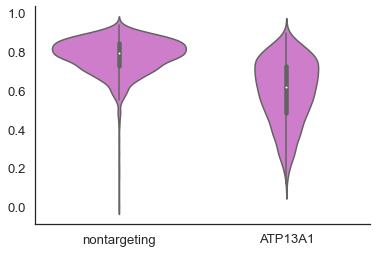

In [12]:
sns.set(font_scale = 1.2, style = 'white')

sns.violinplot(data = df.sort_values('gene',ascending=False), 
              x= 'gene', y = 'channel_corrch1_cell_corr', color = 'orchid')

sns.despine(top = True, right = True)
plt.xlabel('')
plt.ylabel('')
plt.savefig('figs/bj1_mavs_mito_corr.tif', dpi = 300, bbox_inches='tight')
plt.show()
##

# Supplement

### ER localization

/Users/rcarlson/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rcarlson/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.9110379232398368
0.8866871894083745


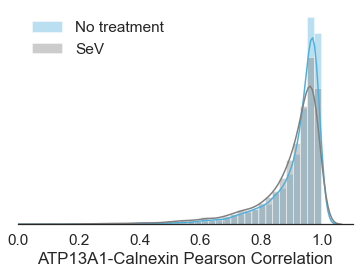

In [11]:
df = pd.read_hdf('../../Zenodo_IRF3/Figure5/Supplement/ER_Localization/m135.hdf')
df.loc[df.well.isin(['B03','B07']),'rep'] = 1
df.loc[df.well.isin(['B04','B08']),'rep'] = 2
df.loc[df.well.isin(['B03','B04']),'gene'] = 'nontargeting'
df.loc[df.well.isin(['B07','B08']),'gene'] = 'SeV'

sns.set(font_scale = 1.4, style = 'white')

g=sns.distplot(df.query('gene == "nontargeting"').channel_corrch2_cell_corr,color = pal[1],label= 'No treatment')
g=sns.distplot(df.query('gene == "SeV"').channel_corrch2_cell_corr,color = 'gray',label = 'SeV')
sns.despine(top=True,left=True,right= True)
plt.legend(frameon=False)
g.set(yticklabels = [], yticks = [])
plt.xlim(0,1.1)
plt.xlabel('ATP13A1-Calnexin Pearson Correlation')
print(df.query('gene == "nontargeting"').channel_corrch2_cell_corr.mean())
print(df.query('gene == "SeV"').channel_corrch2_cell_corr.mean())
sns.despine(top = True, right = True, left = True)
plt.ylabel('')
plt.savefig('figs/m135_atp13a1_ch2_cell_corr.tif',dpi=150,bbox_inches = 'tight')

No handles with labels found to put in legend.


10509
gate applied, retained  89 % of data
number nt
channel_corrch2_cell_corr
auc done
           gene  rep  channel_corrch2_cell_corr
0  nontargeting  1.0                  -0.000521
1  nontargeting  2.0                   0.000548
2           SeV  1.0                  -0.003710
3           SeV  2.0                  -0.019593
[('nontargeting', 1.0, 2), ('SeV', 0.2803943273624725, 2)]
           gene      pval  fdr_bh_adj_p  significant pval_text
0  nontargeting  1.000000      1.000000        False          
1           SeV  0.280394      0.560789        False          
           gene  rep  channel_corrch2_cell_corr
0  nontargeting  1.0                  -0.000521
1  nontargeting  2.0                   0.000548
2           SeV  1.0                  -0.003710
3           SeV  2.0                  -0.019593
grped done
           gene  rep  channel_corrch2_cell_corr
0  nontargeting  1.0                  -0.000521
1  nontargeting  2.0                   0.000548
2           SeV  1.0         

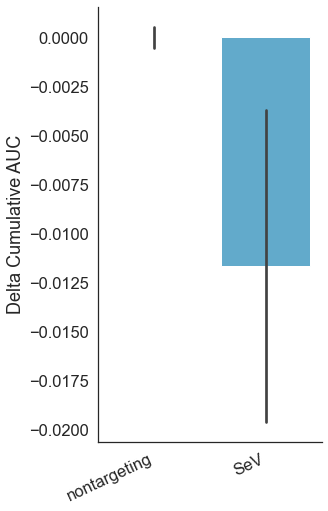

(-1, 1)


KeyboardInterrupt: 

<Figure size 72x576 with 0 Axes>

Error in callback <function flush_figures at 0x7ffecf910ea0> (for post_execute):


KeyboardInterrupt: 

In [30]:
df = pd.read_hdf('../../Zenodo_IRF3/Figure5/Supplement/ER_Localization/m135.hdf')
df.loc[df.well.isin(['B03','B07']),'rep'] = 1
df.loc[df.well.isin(['B04','B08']),'rep'] = 2
df.loc[df.well.isin(['B03','B04']),'gene'] = 'nontargeting'
df.loc[df.well.isin(['B07','B08']),'gene'] = 'SeV'

aucs, grped = produce_barplot_nosg(df,  df_name = 'm135', pshow = True, 
                                    genes = df.gene,
                        gate = '100 < i <1380 & 100 < j < 1380 & area < 3000 & channel_cell_median < 50000',
                    replist = [1,2],  nbins=50,  
                        feature='channel_corrch2_cell_corr', plot_nt = True, range_vals = (-1,1),
                   alpha=.05, pval_sort = False)

### ER stress


683123
gate applied, retained  84 % of data
number nt 6000
channel_cell_median
auc done
                  gene  n_sg  fisher_combined_chi          pval  fdr_bh_adj_p  \
0        noSeV-ATP13A1   2.0             1.682132  7.939608e-01      0.991417   
1              ATP13A1   2.0             2.379074  6.664123e-01      0.991417   
2   noSeV-nontargeting   2.0             0.274222  9.914169e-01      0.991417   
3         nontargeting   2.0             5.026344  2.846051e-01      0.711513   
4  thapsi-nontargeting   2.0            34.468029  5.973719e-07      0.000003   

   significant pval_text  
0        False            
1        False            
2        False            
3        False            
4         True      ****  
grped done
                   gene                  sgRNA  rep  channel_cell_median  \
0         noSeV-ATP13A1        noSeV-ATP13A1_0    1            -0.033289   
1         noSeV-ATP13A1        noSeV-ATP13A1_0    2            -0.006092   
2         noSeV-ATP13A1 

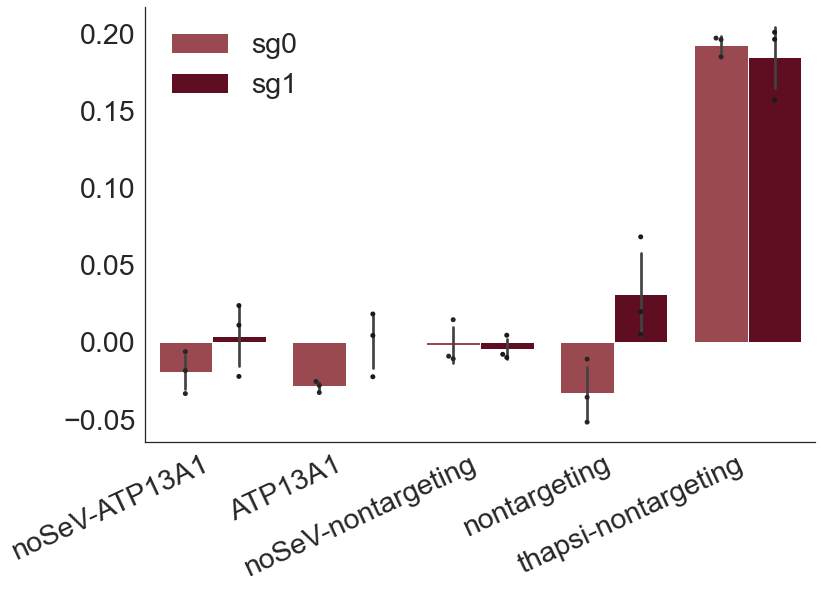

In [4]:
df = pd.read_hdf('../../Zenodo_IRF3/Figure5/Supplement/ER_stress/m94_grp78.hdf')
aucs, grped = produce_barplot_general(df,  df_name = 'grp78', pshow = True, genes = pd.unique(df.gene),
                        gate = '100 < i <1380 & 100 < j < 1380 & area < 5000 ',
                    replist = [1,2,3],  nbins=50,  
                        feature='channel_cell_median', plot_nt = True, range_vals = (0,14000),
                   alpha=.05, pval_sort = False, pal = 'red')

##

### Lipid content


76784
gate applied, retained  83 % of data
number nt 6000
channel_cell_median
auc done
           gene  n_sg  fisher_combined_chi      pval  fdr_bh_adj_p  \
0       ATP13A1   2.0             1.988256  0.737919      0.903608   
1  nontargeting   2.0             1.040408  0.903608      0.903608   

   significant pval_text  
0        False            
1        False            
grped done
            gene           sgRNA  rep  channel_cell_median sgRNA_num
0        ATP13A1       ATP13A1_0    5             0.007260       sg0
1        ATP13A1       ATP13A1_1    5             0.017961       sg1
2   nontargeting  nontargeting_0    5             0.026115       sg0
3   nontargeting  nontargeting_1    5             0.030744       sg1
4        ATP13A1       ATP13A1_0    6            -0.012227       sg0
5        ATP13A1       ATP13A1_1    6            -0.034053       sg1
6   nontargeting  nontargeting_0    6            -0.012082       sg0
7   nontargeting  nontargeting_1    6             0.023029

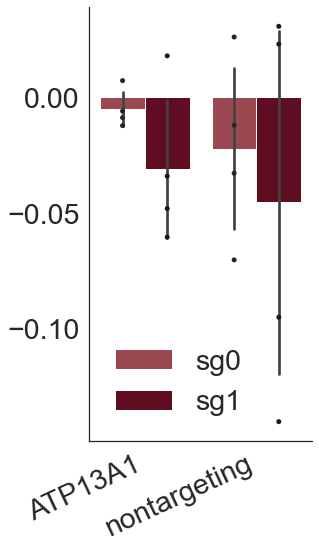

In [19]:
df = pd.read_hdf('../../Zenodo_IRF3/Figure5/Supplement/Lipid/m144_dph.hdf')

aucs, grped = produce_barplot_general(df,  df_name = 'm144dph', pshow = True, 
                                    genes = df.gene,
                        gate = '100 < i <1380 & 100 < j < 1380 & area < 3000 & channel_cell_median < 50000',
                    replist = [1,2,3,4],  nbins=100,  
                        feature='channel_cell_median', plot_nt = True, range_vals = (500, 15000),
                   alpha=.05, pval_sort = False, pal = 'red')

### Mito


301636
gate applied, retained  64 % of data
number nt 6000
channel_cell_median
auc done
           gene  n_sg  fisher_combined_chi          pval  fdr_bh_adj_p  \
0       ATP13A1   2.0             4.249864  3.732452e-01  5.598679e-01   
1  nontargeting   2.0             1.585512  8.113936e-01  8.113936e-01   
2          CCCP   2.0            47.621637  1.131707e-09  3.395121e-09   

   significant pval_text  
0        False            
1        False            
2         True      ****  
grped done
            gene           sgRNA  rep  channel_cell_median sgRNA_num
0        ATP13A1       ATP13A1_0    1             0.024573       sg0
1        ATP13A1       ATP13A1_1    1             0.114396       sg1
2   nontargeting  nontargeting_0    1            -0.032126       sg0
3   nontargeting  nontargeting_1    1             0.024436       sg1
4           CCCP          CCCP_0    1            -0.258651       sg0
5           CCCP          CCCP_1    1            -0.268150       sg1
6        ATP1

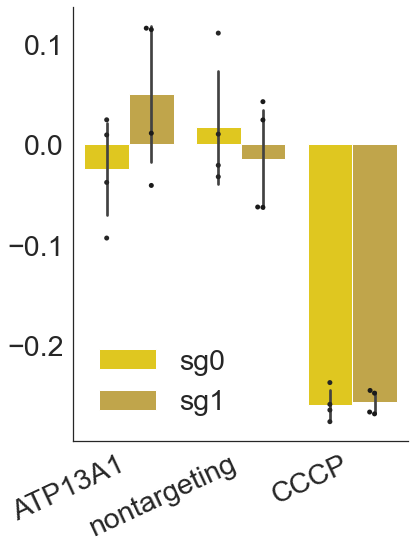

In [18]:
df = pd.read_hdf('../../Zenodo_IRF3/Figure5/Supplement/Mito/m145_pot.hdf')
df.loc[df.well.isin(['A07','B07','C07','D07','A08','B08','C08','D08']),'gene'] = "CCCP"
df.loc[df.well.isin(['A07','B07','C07','D07']),'sgRNA'] = "CCCP_0"
df.loc[df.well.isin(['A08','B08','C08','D08']),'sgRNA'] = "CCCP_1"


aucs, grped = produce_barplot_general(df,  df_name = 'm145pot', pshow = True, 
                                    genes = pd.unique(df.gene),
                        gate = '100 < i <1380 & 100 < j < 1380 & area < 500 & channel_cell_median < 55000',
                    replist = [1,2,3,4],  nbins=100,  
                        feature='channel_cell_median', plot_nt = True, range_vals = (500, 15000),
                   alpha=.05, pval_sort = False, pal = 'yellow')

316950
gate applied, retained  57 % of data
number nt 6000
channel_cell_median
auc done
           gene  n_sg  fisher_combined_chi          pval  fdr_bh_adj_p  \
0       ATP13A1   2.0             9.164776  5.711028e-02  8.566541e-02   
1  nontargeting   2.0             6.449654  1.679904e-01  1.679904e-01   
2     Antimycin   2.0            51.525962  1.733061e-10  5.199184e-10   

   significant pval_text  
0        False            
1        False            
2         True      ****  
grped done
            gene           sgRNA  rep  channel_cell_median sgRNA_num
0        ATP13A1       ATP13A1_0    5            -0.034647       sg0
1        ATP13A1       ATP13A1_1    5             0.053850       sg1
2   nontargeting  nontargeting_0    5             0.107337       sg0
3   nontargeting  nontargeting_1    5            -0.089793       sg1
4      Antimycin     Antimycin_0    5             0.406650       sg0
5      Antimycin     Antimycin_1    5             0.406888       sg1
6        ATP1

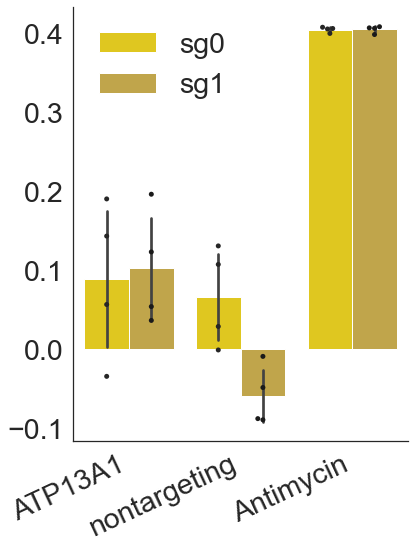

In [17]:
df = pd.read_hdf('../../Zenodo_IRF3/Figure5/Supplement/Mito/m145_ros.hdf')
df.loc[df.well.isin(['E07','F07','G07','H07','E08','F08','G08','H08']),'gene'] = "Antimycin"
df.loc[df.well.isin(['E07','F07','G07','H07']),'sgRNA'] = "Antimycin_0"
df.loc[df.well.isin(['E08','F08','G08','H08']),'sgRNA'] = "Antimycin_1"


aucs, grped = produce_barplot_general(df,  df_name = 'm145ros', pshow = True, 
                                    genes = pd.unique(df.gene),
                        gate = '100 < i <1380 & 100 < j < 1380 & area < 500 & channel_cell_median < 55000',
                    replist = [1,2,3,4],  nbins=100,  
                        feature='channel_cell_median', plot_nt = True, range_vals = (500, 15000),
                   alpha=.05, pval_sort = False, pal = 'yellow')

### TBK1 and MAVS

62095
gate applied, retained  58 % of data
number nt 6000
channel_cell_median
auc done
           gene  n_sg  fisher_combined_chi      pval  fdr_bh_adj_p  \
0       ATP13A1   2.0            18.577550  0.000951      0.001903   
1  nontargeting   2.0             4.789911  0.309541      0.309541   

   significant pval_text  
0         True       ***  
1        False            
grped done
            gene           sgRNA  rep  channel_cell_median sgRNA_num
0        ATP13A1       ATP13A1_0    1            -0.036558       sg0
1        ATP13A1       ATP13A1_1    1            -0.029380       sg1
2   nontargeting  nontargeting_0    1             0.022097       sg0
3   nontargeting  nontargeting_1    1            -0.012056       sg1
4        ATP13A1       ATP13A1_0    2            -0.012017       sg0
5        ATP13A1       ATP13A1_1    2            -0.044193       sg1
6   nontargeting  nontargeting_0    2             0.039364       sg0
7   nontargeting  nontargeting_1    2            -0.016254

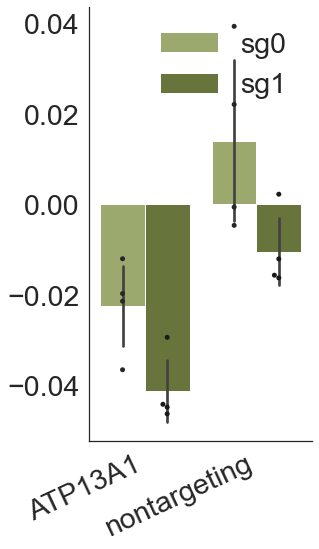

In [26]:
df = pd.read_hdf('../../Zenodo_IRF3/Figure5/Supplement/TBK1_MAVS/m142_mavs.hdf')

aucs, grped = produce_barplot_general(df,  df_name = 'm142-mavs', pshow = True, 
                                    genes = df.gene,
                        gate = '100 < i <1380 & 100 < j < 1380 & area < 500 & area > 70 & channel_cell_median < 50000',
                    replist = [1,2,3,4],  nbins=50,  
                        feature='channel_cell_median', plot_nt = True, range_vals = (5000,14000),
                   alpha=.05, pval_sort = False, pal = 'green')

##

113549
gate applied, retained  82 % of data
number nt 6000
channel_cell_median
auc done
           gene  n_sg  fisher_combined_chi      pval  fdr_bh_adj_p  \
0       ATP13A1   2.0            22.605407  0.000152      0.000304   
1  nontargeting   2.0             3.871576  0.423665      0.423665   

   significant pval_text  
0         True       ***  
1        False            
grped done
            gene           sgRNA  rep  channel_cell_median sgRNA_num
0        ATP13A1       ATP13A1_0    1            -0.057353       sg0
1        ATP13A1       ATP13A1_1    1            -0.038652       sg1
2   nontargeting  nontargeting_0    1            -0.017858       sg0
3   nontargeting  nontargeting_1    1            -0.028147       sg1
4        ATP13A1       ATP13A1_0    2            -0.049449       sg0
5        ATP13A1       ATP13A1_1    2            -0.030941       sg1
6   nontargeting  nontargeting_0    2             0.015249       sg0
7   nontargeting  nontargeting_1    2            -0.00604

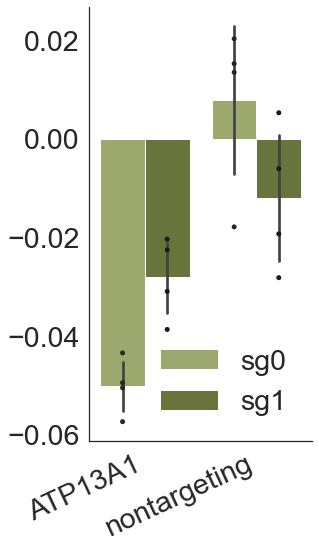

In [24]:
df = pd.read_hdf('../../Zenodo_IRF3/Figure5/Supplement/TBK1_MAVS/m142_tbk1.hdf')

aucs, grped = produce_barplot_general(df,  df_name = 'm142tbk1', pshow = True, 
                                    genes = df.gene,
                        gate = '100 < i <1380 & 100 < j < 1380 & area < 3000 & channel_cell_median < 50000',
                    replist = [1,2,3,4],  nbins=50,  
                        feature='channel_cell_median', plot_nt = True, range_vals = (500, 30000),
                   alpha=.05, pval_sort = False, pal = 'green')